In [1]:
# Using this location as a root Directory
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/Deep learning"
os.chdir(ROOT)

In [2]:
# Checking all the avaliable files
os.listdir()

['logs',
 'model_ckp.h5',
 'model.h5',
 'ANN_with_callbacks.ipynb',
 'APS_in_dl.ipynb',
 'Handwritten Digit Classification.ipynb']

In [3]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [4]:
# Importing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/deep-learning/main/aps_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.sample(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
4890,neg,1170,2,2130706444,na,0,0,0,0,0,...,4740,1546,4308,5228,5660,27034,442,0,0,0
232,neg,40812,na,2130706432,88,0,0,0,0,0,...,405414,202670,393480,284982,221326,131186,166654,4222,0,0
201,neg,311324,0,1030,na,0,0,0,0,10090,...,2549092,1215838,1885904,1549396,4504448,2219490,16220,0,0,0
1941,neg,109830,na,3582,3314,0,0,0,0,0,...,985304,643874,2046832,1377194,96906,37038,44144,368,0,0
4511,neg,8,0,6,4,0,0,0,0,0,...,42,16,50,44,0,0,0,0,0,0


In [7]:
# Replacing na with NAN
df = df.replace("na", np.nan)

In [8]:
pd.options.display.max_rows = 1000

In [10]:
# Percentage of nan values
df.isna().mean()*100

class      0.00
aa_000     0.00
ab_000    76.98
ac_000     6.16
ad_000    24.72
ae_000     4.48
af_000     4.48
ag_000     1.16
ag_001     1.16
ag_002     1.16
ag_003     1.16
ag_004     1.16
ag_005     1.16
ag_006     1.16
ag_007     1.16
ag_008     1.16
ag_009     1.16
ah_000     1.20
ai_000     1.12
aj_000     1.12
ak_000     7.68
al_000     1.30
am_0       1.12
an_000     1.30
ao_000     1.06
ap_000     1.30
aq_000     1.06
ar_000     4.84
as_000     1.12
at_000     1.12
au_000     1.12
av_000     4.48
ax_000     4.48
ay_000     1.16
ay_001     1.16
ay_002     1.16
ay_003     1.16
ay_004     1.16
ay_005     1.16
ay_006     1.16
ay_007     1.16
ay_008     1.16
ay_009     1.16
az_000     1.16
az_001     1.16
az_002     1.16
az_003     1.16
az_004     1.16
az_005     1.16
az_006     1.16
az_007     1.16
az_008     1.16
az_009     1.16
ba_000     1.22
ba_001     1.22
ba_002     1.22
ba_003     1.22
ba_004     1.22
ba_005     1.22
ba_006     1.22
ba_007     1.22
ba_008     1.22
ba_009  

In [11]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [12]:
### Filling null values in feature with median of that feature
for feature in [feature for feature in df.columns if feature not in ['class']]:
    df[feature]=df[feature].fillna(df[feature].median())


In [13]:
df.isna().sum().sum()

0

In [14]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [15]:
X = df.drop("class", axis=1)

In [16]:
y = df["class"]

In [17]:
X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [18]:
y = pd.get_dummies(y, drop_first=True)

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [22]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### **Refrence***
[Tensorflow](https://www.tensorflow.org/api_docs/python/tf)

In [23]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [24]:
classifier = Sequential()

classifier.add(Dense(units=10, kernel_initializer="he_uniform", activation="relu", input_dim=170))
classifier.add(Dense(units=10, kernel_initializer="he_uniform", activation="relu"))
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [25]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.25)

Epoch 1/10
300/300 [==============================] - 4s 3ms/step - loss: 0.6732 - accuracy: 0.7697 - val_loss: 0.4191 - val_accuracy: 0.9730
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1842 - accuracy: 0.9787 - val_loss: 0.1089 - val_accuracy: 0.9750
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9867 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 0.0658 - val_accuracy: 0.9770
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0566 - val_accuracy: 0.9790
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0196 - accuracy: 0.9950 - val_loss: 0.0631 - val_accuracy: 0.9830
Epoch 

In [28]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
model_history.history["accuracy"]

[0.7696666717529297,
 0.9786666631698608,
 0.9866666793823242,
 0.9893333315849304,
 0.9900000095367432,
 0.9929999709129333,
 0.9950000047683716,
 0.9943333268165588,
 0.9950000047683716,
 0.996666669845581]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


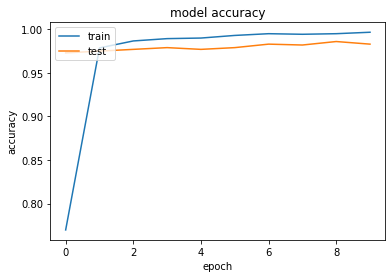

In [30]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

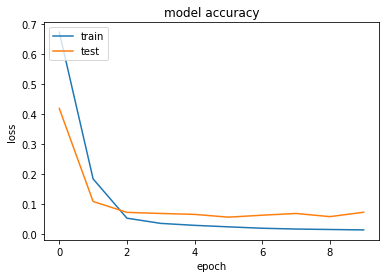

In [31]:

# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
X_test.shape

(1000, 170)

In [33]:
y_pred=classifier.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [34]:
#for the sigmoid my threshold is 0.5
y_pred=y_pred>0.5

In [37]:
from sklearn.metrics import confusion_matrix

In [35]:
y_test.shape, y_pred.shape     

((1000, 1), (1000, 1))

In [38]:
confusion_matrix(y_test, y_pred)

array([[974,  12],
       [  3,  11]])

In [39]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [40]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_01_22_07_05_05_.h5


### **Hyper parameter Tuning**

In [41]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.5 MB/s eta 0:00:00


In [42]:
from kerastuner.tuners import RandomSearch

<ipython-input-42-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [43]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=32, kernel_initializer = 'he_uniform', activation='relu', input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  optimizer = hp.Choice("optimizer", values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [44]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='project1', project_name='aps-fault')

In [45]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Trial 4 Complete [00h 00m 06s]
val_accuracy: 0.9919999837875366

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 00m 15s


In [46]:











tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [47]:
mymodel = tuner.get_best_models(num_models=1)[0]

In [48]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [49]:
for i in range( 2, 20):
  print(i)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [50]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [51]:
tuner_second = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='project3', 
                            project_name='aps-fault-sensor')

In [52]:
tuner_second.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.9909999966621399

Best val_accuracy So Far: 0.9909999966621399
Total elapsed time: 00h 00m 27s


In [53]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 16,
 'units_0': 288,
 'units_1': 352,
 'learning_rate': 0.0001,
 'units_2': 448,
 'units_3': 320,
 'units_4': 352,
 'units_5': 224,
 'units_6': 96,
 'units_7': 128,
 'units_8': 320,
 'units_9': 128,
 'units_10': 480,
 'units_11': 320,
 'units_12': 448,
 'units_13': 256,
 'units_14': 64,
 'units_15': 64,
 'units_16': 32,
 'units_17': 128,
 'units_18': 416,
 'units_19': 512}

In [54]:
classifier2 = tuner_second.get_best_models(num_models=1)[0]

In [57]:
# classifier2.summary()